## Import Libraries

In [1]:
import gym
import copy
import time
import warnings
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

## Functions

In [3]:
def plot_algorithms_comparison(name, slippery, gamma, algorithms, theta=1e-6):
    fig = plt.figure(figsize=(16, 5))
    
    for idx, (algo_name, algo_func) in enumerate(algorithms, 1):
        plt.subplot(1, 3, idx)
        env = gym.make(name, is_slippery=slippery)
        env.seed(42)
        env.action_space.seed(42)
        out = False
        if algo_name == "Policy Iteration":
            policy, V, out, itr = algo_func(env, gamma, theta)
        else:
            policy, V = algo_func(env, gamma, theta)
            
        plt.imshow(1-V.reshape(env.env.nrow, env.env.ncol), cmap='gray', interpolation='none', clim=(0,1))
        ax = plt.gca()
        ax.set_xticks(np.arange(env.env.ncol)-.5)
        ax.set_yticks(np.arange(env.env.nrow)-.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        for s in range(env.observation_space.n):
            x = s % env.env.nrow
            y = int(s/env.env.ncol)
            a = policy[s]
            gray = np.array((0.32,0.36,0.38))
            text_color = 'white' if V[s] > 0.5 else 'black'
            
            if env.desc.tolist()[y][x] == b'G':
                plt.text(x-0.45, y-0.3, 'goal', color='red', weight='bold')
                continue

            if a[0] > 0.0: plt.arrow(x, y, float(a[0])*-.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[1] > 0.0: plt.arrow(x, y, 0.0, float(a[1])*.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[2] > 0.0: plt.arrow(x, y, float(a[2])*.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[3] > 0.0: plt.arrow(x, y, 0.0, float(a[3])*-.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)

            if env.desc.tolist()[y][x] == b'F': 
                plt.text(x-0.45, y-0.3, 'ice', color=text_color)
            if env.desc.tolist()[y][x] == b'S': 
                plt.text(x-0.45, y-0.3, 'start', color=(0.21,0.51,0.48), weight='bold')

            if V[s] > 0:
                vstr = '{:.6f}'.format(V[s])
                plt.text(x-0.45, y+0.45, vstr, color=text_color, fontsize=6)
        
        plt.grid(color='white', linestyle=':')
        ax.set_axisbelow(True)
        ax.tick_params(color='white', which='both', top='off', left='off', right='off', bottom='off')
        if algo_name == "Policy Iteration":
            plt.title(f"{algo_name}\n{name}, Slippery={slippery}, γ={gamma}, θ={theta}, out_loop={out}, eval_itr={itr}", fontsize=10)
        else:
            plt.title(f"{algo_name}\n{name}, Slippery={slippery}, γ={gamma}, θ={theta}", fontsize=10)
            
    
    plt.tight_layout()
    plt.show()

In [4]:
def plot_truncated_policy_comparision(name, slippery, gamma, list_iterations):
    fig = plt.figure(figsize=(30, 6))
    
    for idx, n in enumerate(list_iterations, 1):
        plt.subplot(1, len(list_iterations), idx)
        env = gym.make(name, is_slippery=slippery)
        env.seed(42)
        env.action_space.seed(42)
        
        policy, V = truncated_policy_iteration(env, gamma, n_iterations=n)

        plt.imshow(1-V.reshape(env.env.nrow, env.env.ncol), cmap='gray', interpolation='none', clim=(0,1))
        ax = plt.gca()
        ax.set_xticks(np.arange(env.env.ncol)-.5)
        ax.set_yticks(np.arange(env.env.nrow)-.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        for s in range(env.observation_space.n):
            x = s % env.env.nrow
            y = int(s/env.env.ncol)
            a = policy[s]
            gray = np.array((0.32,0.36,0.38))
            text_color = 'white' if V[s] > 0.5 else 'black'
            
            if env.desc.tolist()[y][x] == b'G':
                plt.text(x-0.45, y-0.3, 'goal', color='red', weight='bold')
                continue

            if a[0] > 0.0: plt.arrow(x, y, float(a[0])*-.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[1] > 0.0: plt.arrow(x, y, 0.0, float(a[1])*.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[2] > 0.0: plt.arrow(x, y, float(a[2])*.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)
            if a[3] > 0.0: plt.arrow(x, y, 0.0, float(a[3])*-.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1)

            if env.desc.tolist()[y][x] == b'F': 
                plt.text(x-0.45, y-0.3, 'ice', color=text_color)
            if env.desc.tolist()[y][x] == b'S': 
                plt.text(x-0.45, y-0.3, 'start', color=(0.21,0.51,0.48), weight='bold')

            if V[s] > 0:
                vstr = '{:.6f}'.format(V[s])
                plt.text(x-0.45, y+0.45, vstr, color=text_color, fontsize=6)
        
        plt.grid(color='white', linestyle=':')
        ax.set_axisbelow(True)
        ax.tick_params(color='white', which='both', top='off', left='off', right='off', bottom='off')
        plt.title(f"n_iterations={n}", fontsize=10)
            
    
    plt.tight_layout()
    plt.show()

In [5]:
def run_experiments(name):
    algorithms = [
        ("Policy Iteration", policy_iteration),
        ("Value Iteration", value_iteration),
        ("Truncated Policy Iteration", truncated_policy_iteration)
    ]
    gammas = [0.9, 1.0]
    for gamma in gammas:
        for is_slippery in [False, True]:
            print(f"{name}, Slippery={is_slippery}, γ={gamma}:")
            plot_algorithms_comparison(
                name=name,
                slippery=is_slippery,
                gamma=gamma,
                algorithms=algorithms
            )
            

In [6]:
def run_experiments_truncated(name, list_iterations):
    gammas = [0.9, 1.0]
    for gamma in gammas:
        for is_slippery in [False, True]:
            print(f"{name}, Slippery={is_slippery}, γ={gamma}:")
            plot_truncated_policy_comparision(
                name=name,
                slippery=is_slippery,
                gamma=gamma,
                list_iterations=list_iterations
            )
            

In [7]:
def timing(name, slippery, gamma, func, theta=1e-6):
    env = gym.make(name, is_slippery=slippery)
    env.seed(42)
    env.action_space.seed(42)
    func_name = ""
    if func == policy_iteration:
        func_name = "Policy Iteration"
    elif func == value_iteration:
        func_name = "Value Iteration"
    else:
        func_name = "Truncated Policy Iteration"
    start_time = time.time()
    if func == policy_iteration:
        policy, V, out, itr = func(env, gamma, theta)
    else:
        policy, V = func(env, gamma, theta)
    end_time = time.time()
    elapsed_time = round(end_time - start_time, 4)
    return func_name, gamma, slippery, elapsed_time

In [8]:
def time_experiments(name):
    algorithms = [
        policy_iteration, truncated_policy_iteration, value_iteration
    ]
    gammas = [0.9, 1.0]
    results = []
    for algorithm in algorithms:
        for gamma in gammas:
            for is_slippery in [False, True]:
                func_name, gamma, slippery, elapsed_time = timing(
                    name=name,
                    slippery=is_slippery,
                    gamma=gamma,
                    func=algorithm
                )
                results.append([func_name, gamma, slippery, elapsed_time])

    headers = ["Algorithm", "Gamma", "Slippery", "Time (s)"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

## Policy Iteration

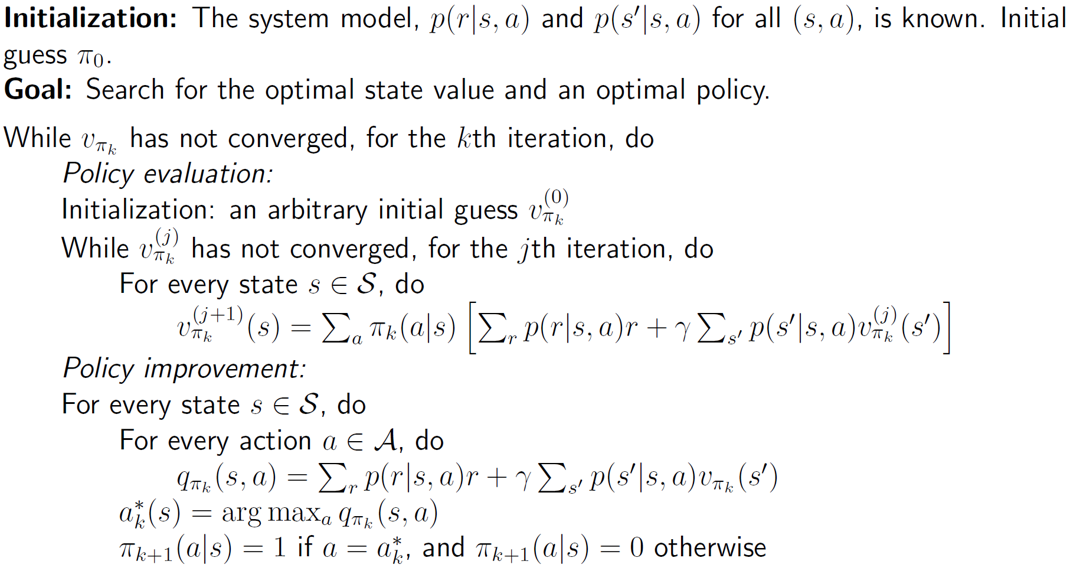

In [9]:
def policy_evaluation(env, policy, gamma=1, theta=1e-6):
    V = np.zeros(env.observation_space.n)
    itr = 0
    while True:
        itr += 1
        delta = 0
        for s in range(env.observation_space.n):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s]-Vs))
            V[s] = Vs
        if delta < theta:
            break
    return V, itr

Get $q_\pi$ from $v_\pi$

In [10]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.action_space.n)
    for a in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

In [11]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n]) / env.action_space.n

    for s in range(env.observation_space.n):
        q = q_from_v(env, V, s, gamma)

        # deterministic policy, will always choose an action
        # policy[s][np.argmax(q)] = 1

        # stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.action_space.n)[i] for i in best_a], axis=0)/len(best_a)
    return policy

In [12]:
def policy_iteration(env, gamma=1, theta=1e-6):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    out = True
    for _ in range(50):
        V, itr = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V, gamma)

        if np.max(abs(policy_evaluation(env, policy, gamma, theta)[0] - policy_evaluation(env, new_policy, gamma, theta)[0])) < theta:
            out = False
            break
        
        policy = copy.copy(new_policy)
    return policy, V, out, itr

## Truncated Policy Iteration

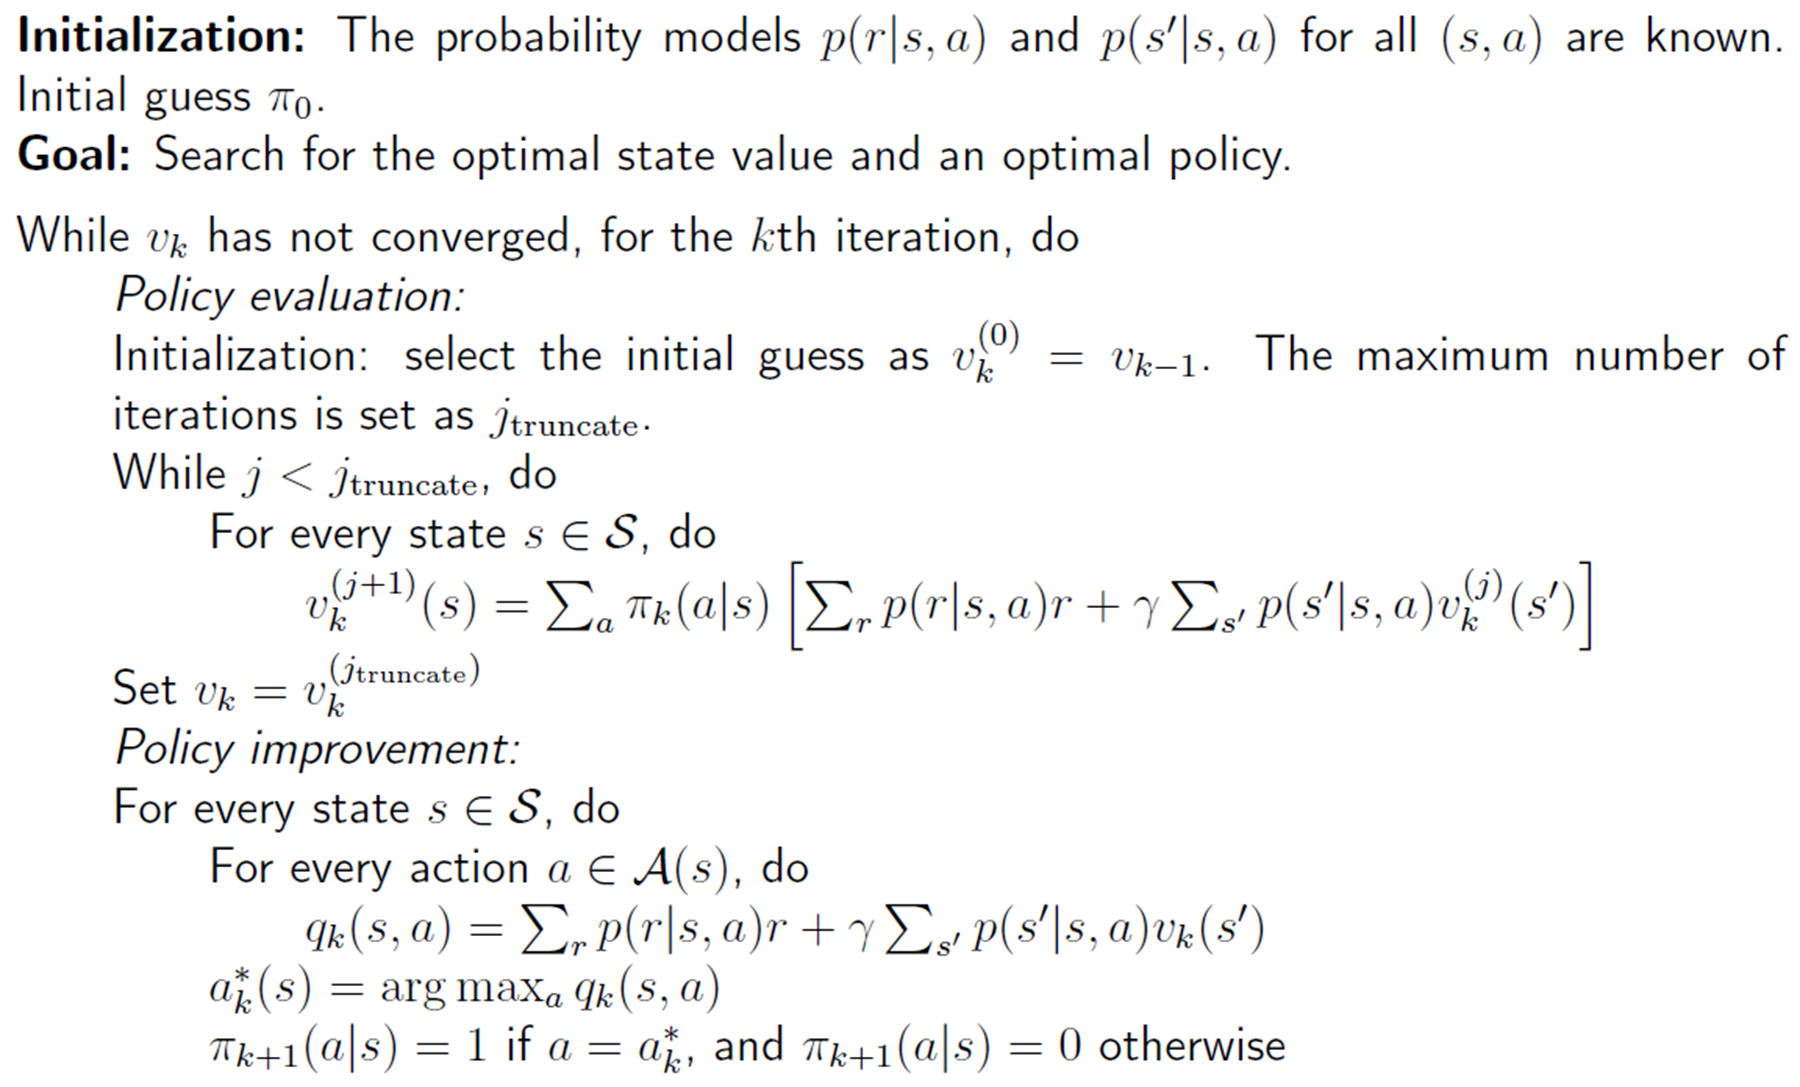

In [13]:
def truncated_policy_evaluation(env, policy, V, gamma, n_iterations):
    for _ in range(n_iterations):
        for s in range(env.observation_space.n):
            v = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    v += action_prob * prob * (reward + gamma * V[next_state])
            V[s] = v
    return V

In [14]:
def truncated_policy_iteration(env, gamma=1.0, theta=1e-6, n_iterations=50):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    V = np.zeros(env.observation_space.n)
    
    while True:
        V = truncated_policy_evaluation(env, policy, V, gamma, n_iterations)
        new_policy = policy_improvement(env, V, gamma)
        
        if np.max(abs(policy_evaluation(env, new_policy, gamma, theta)[0] - policy_evaluation(env, policy, gamma, theta)[0])) < theta:
            break
        
        policy = copy.copy(new_policy)
            
    return policy, V

FrozenLake-v1, Slippery=False, γ=0.9:


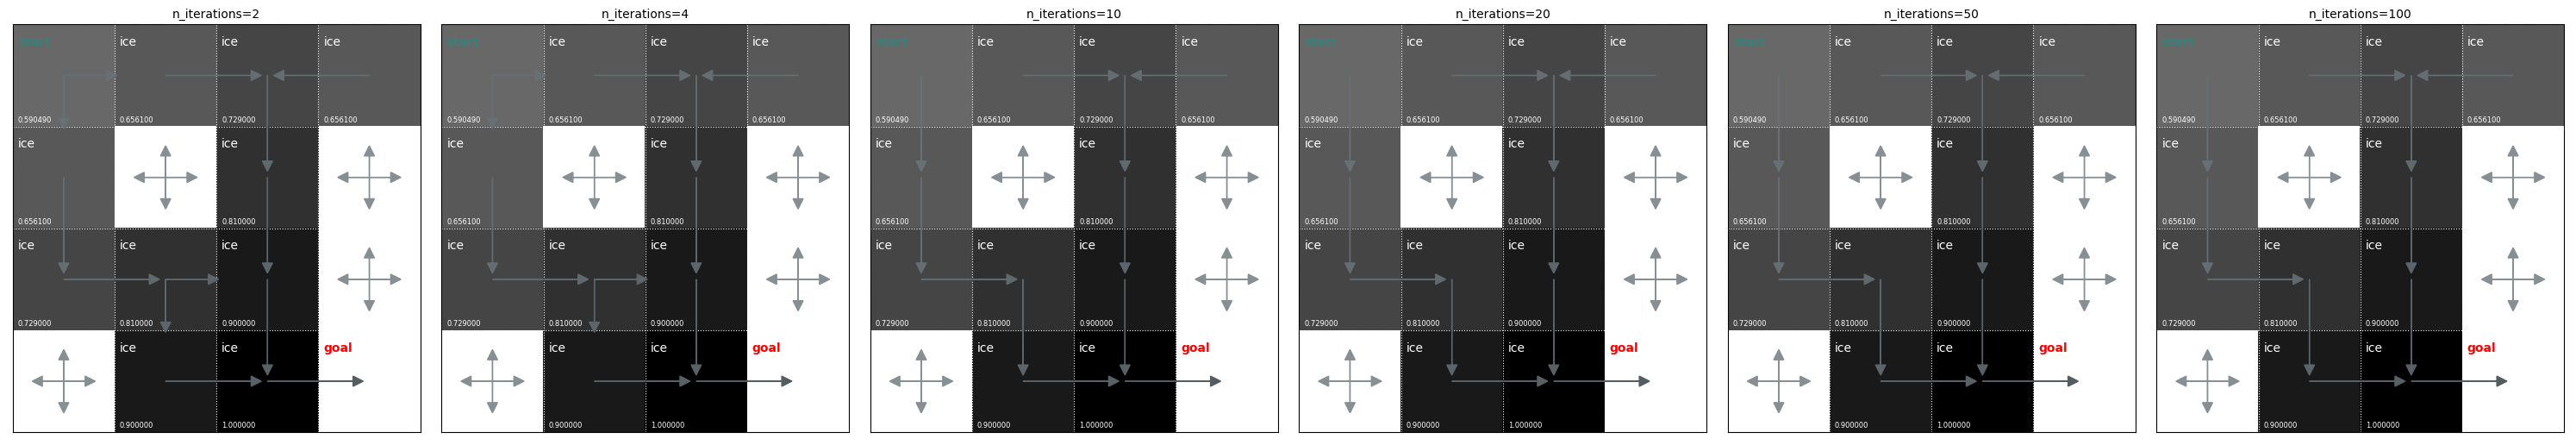

FrozenLake-v1, Slippery=True, γ=0.9:


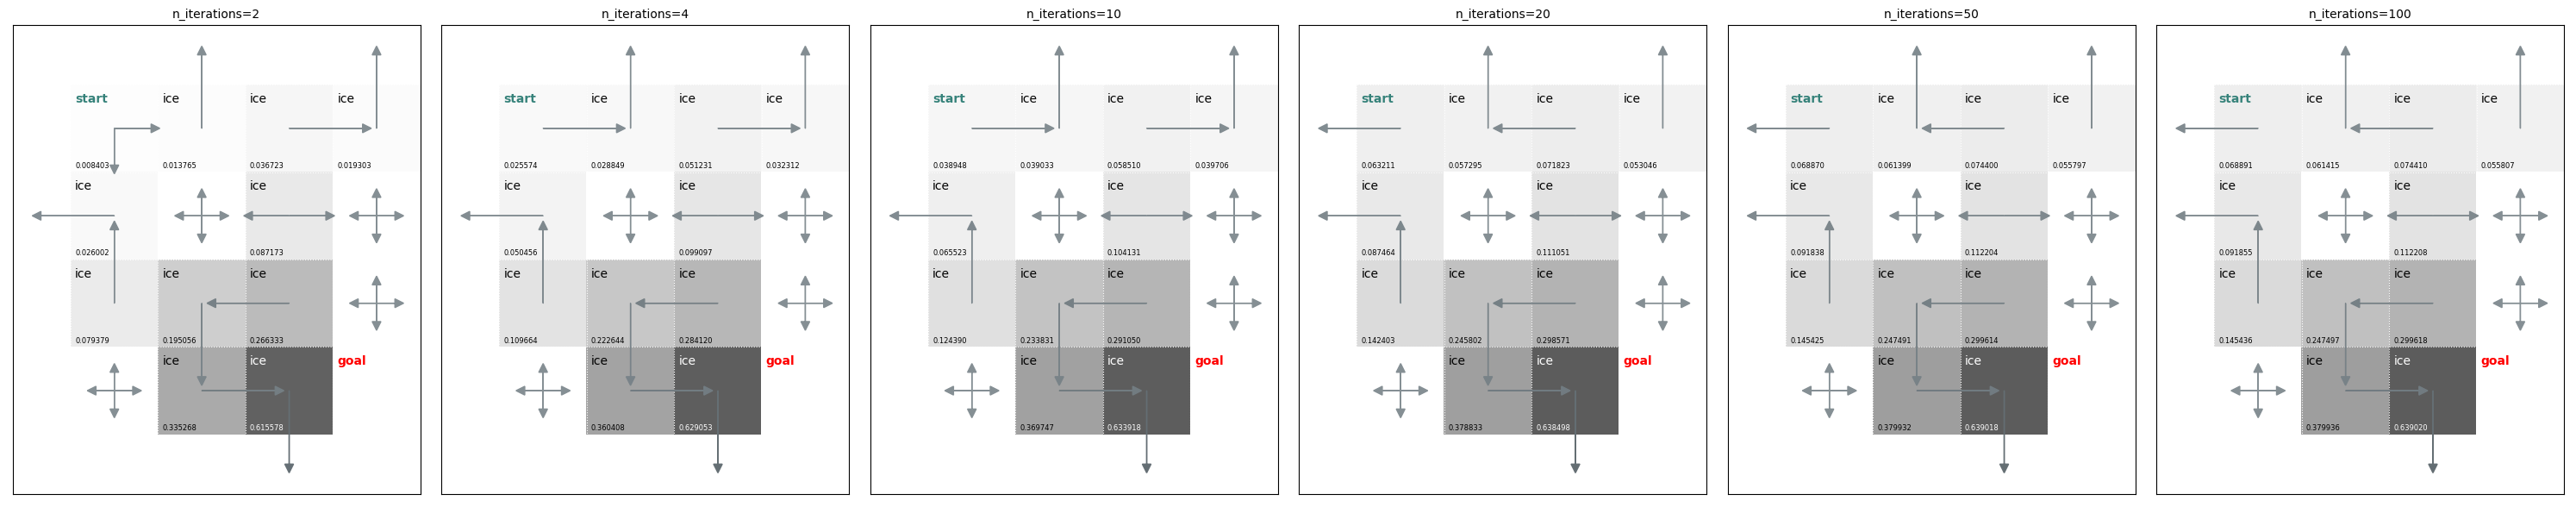

FrozenLake-v1, Slippery=False, γ=1.0:


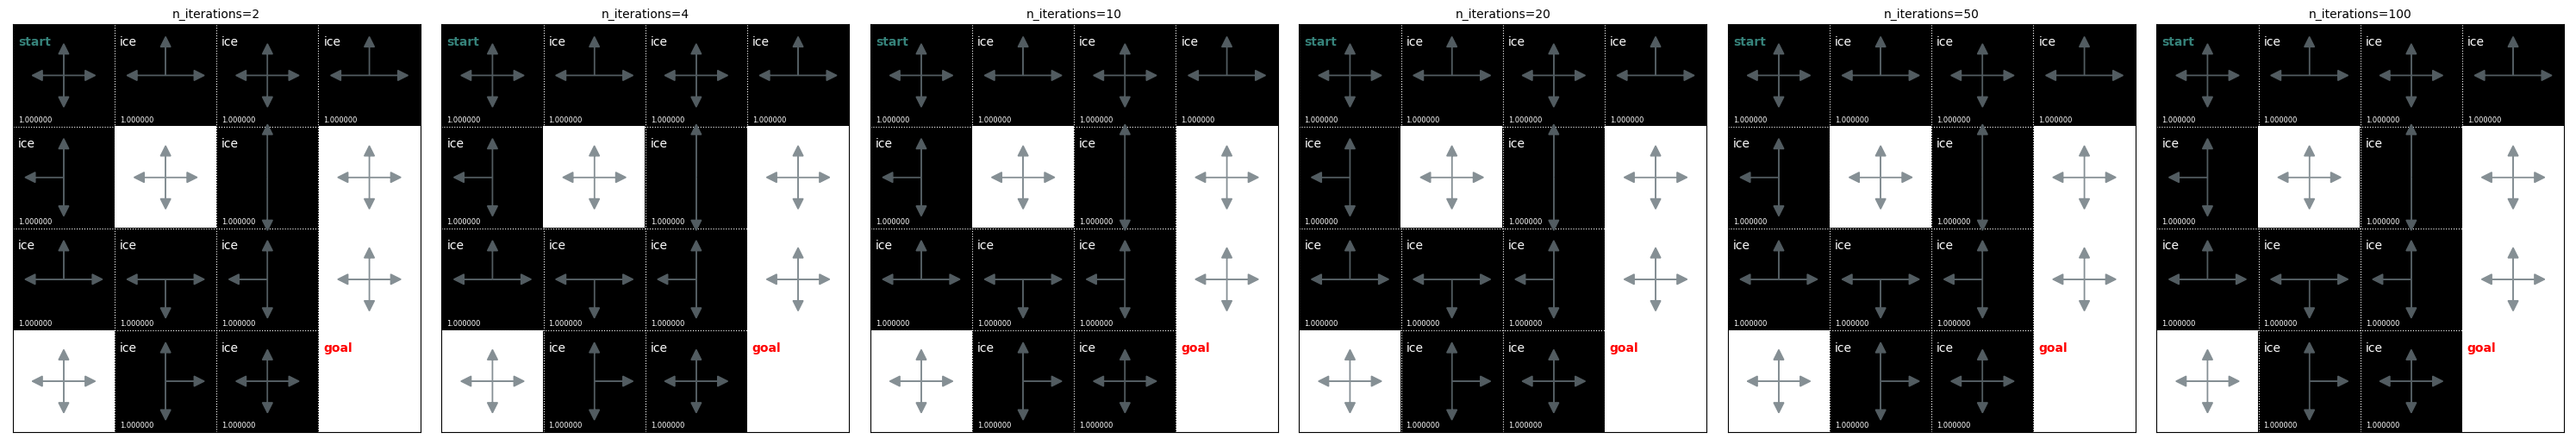

FrozenLake-v1, Slippery=True, γ=1.0:


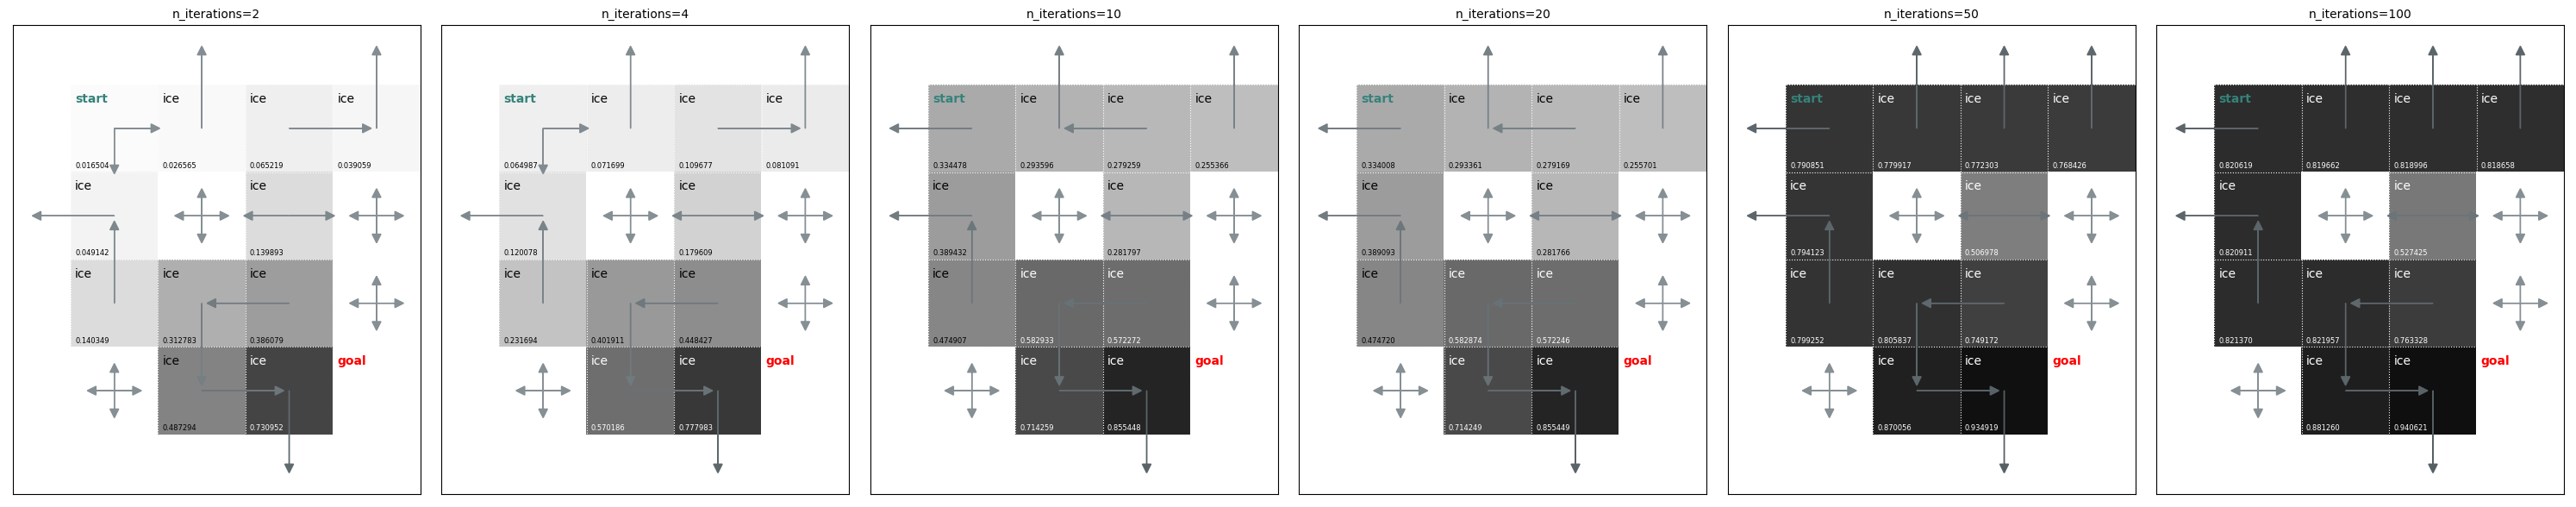

In [15]:
name = 'FrozenLake-v1'
list_iterations = [2, 4, 10, 20, 50, 100]
run_experiments_truncated(name, list_iterations)

FrozenLake8x8-v1, Slippery=False, γ=0.9:


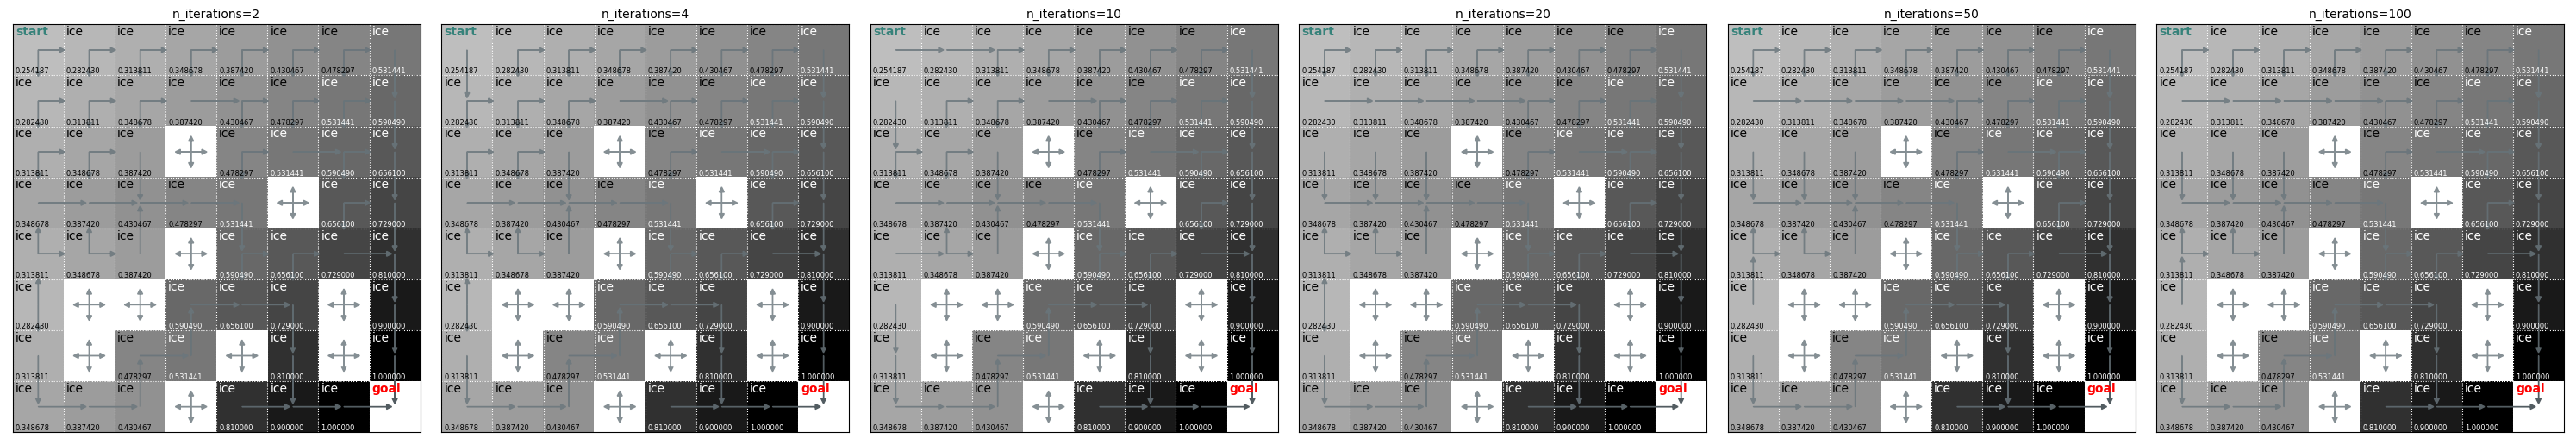

FrozenLake8x8-v1, Slippery=True, γ=0.9:


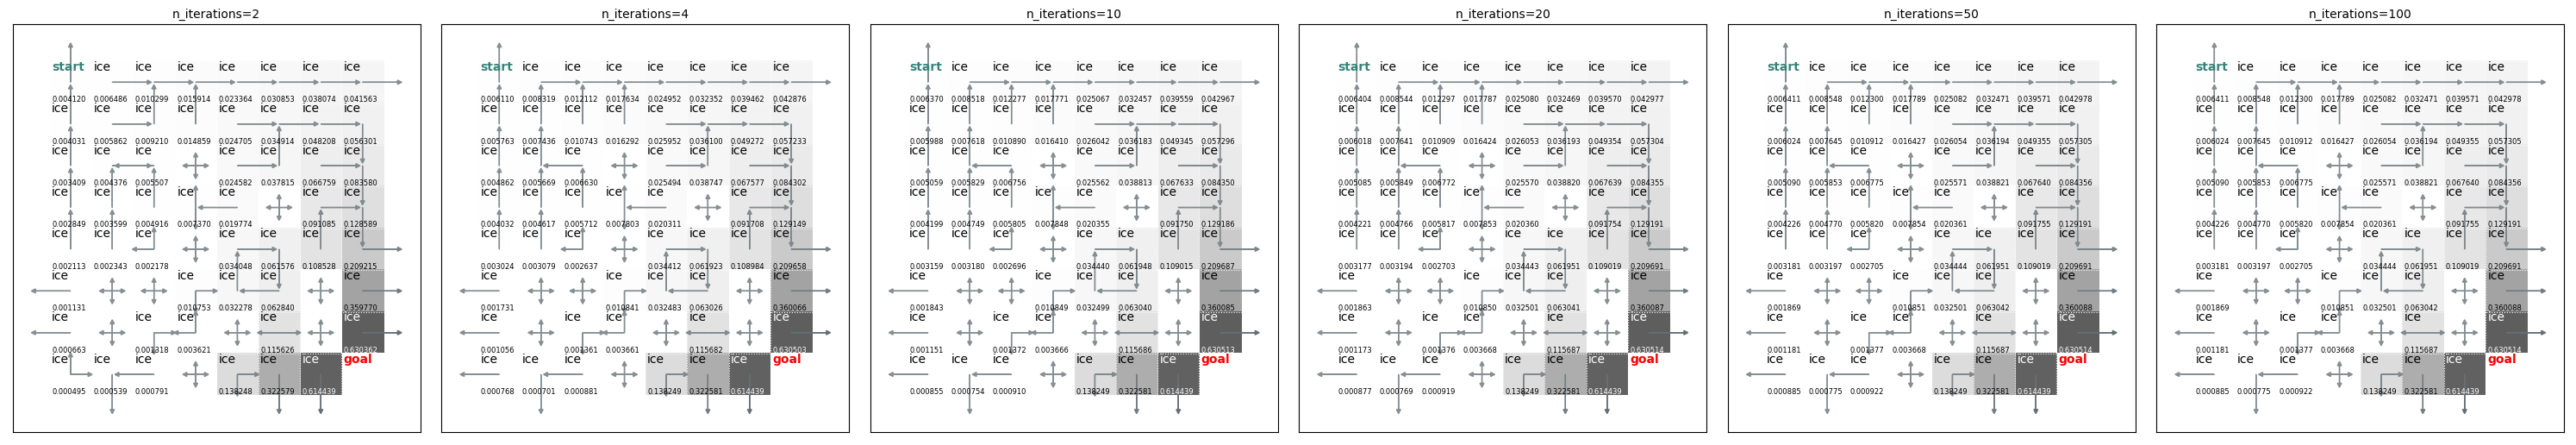

FrozenLake8x8-v1, Slippery=False, γ=1.0:


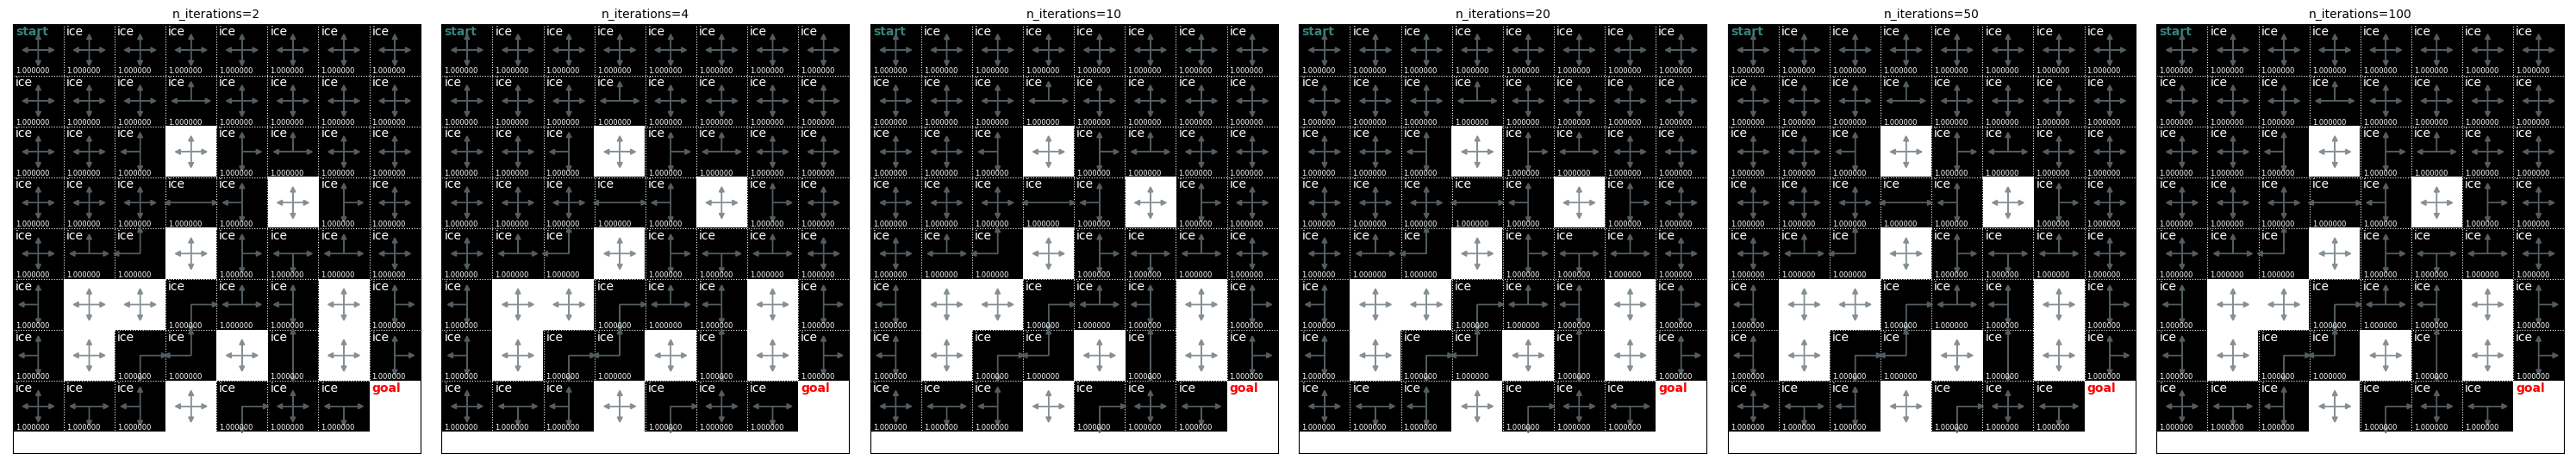

FrozenLake8x8-v1, Slippery=True, γ=1.0:


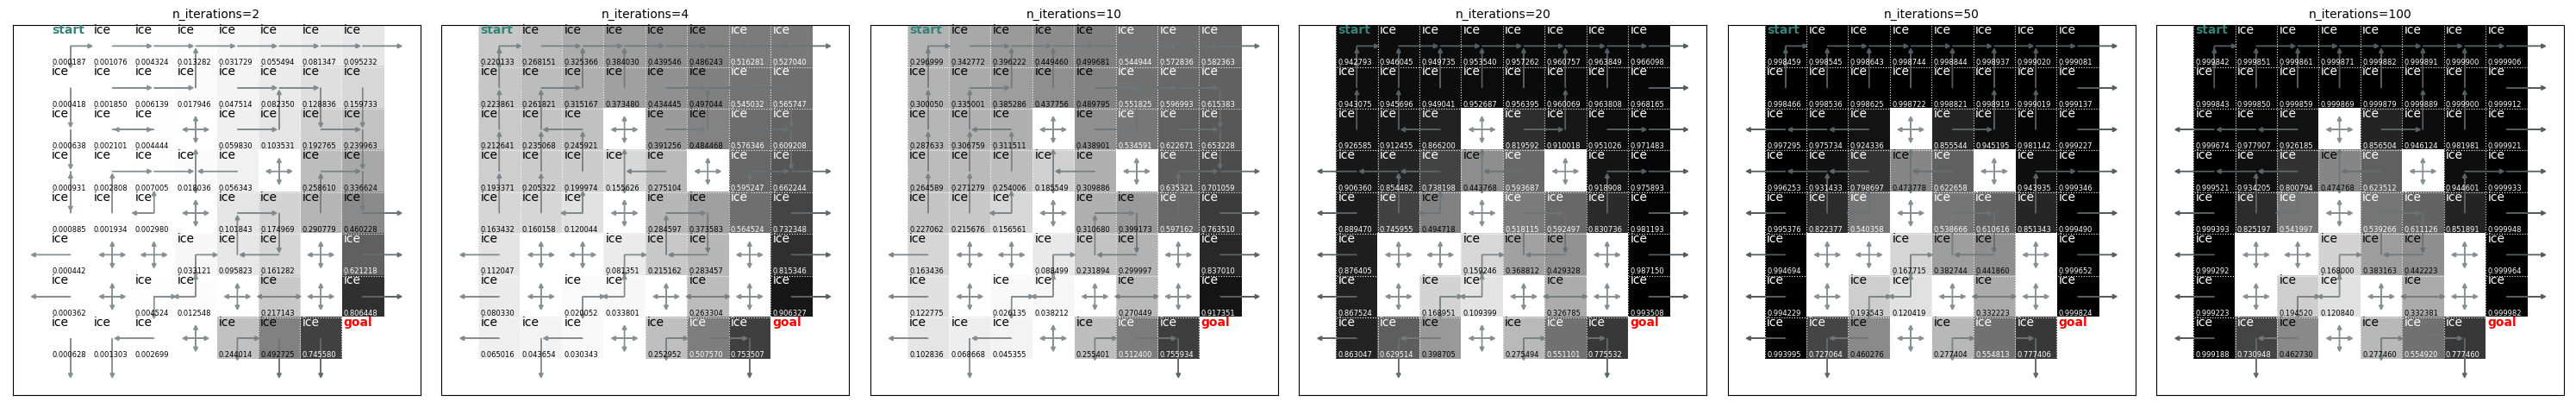

In [16]:
name = 'FrozenLake8x8-v1'
list_iterations = [2, 4, 10, 20, 50, 100]
run_experiments_truncated(name, list_iterations)

## Value Iteration

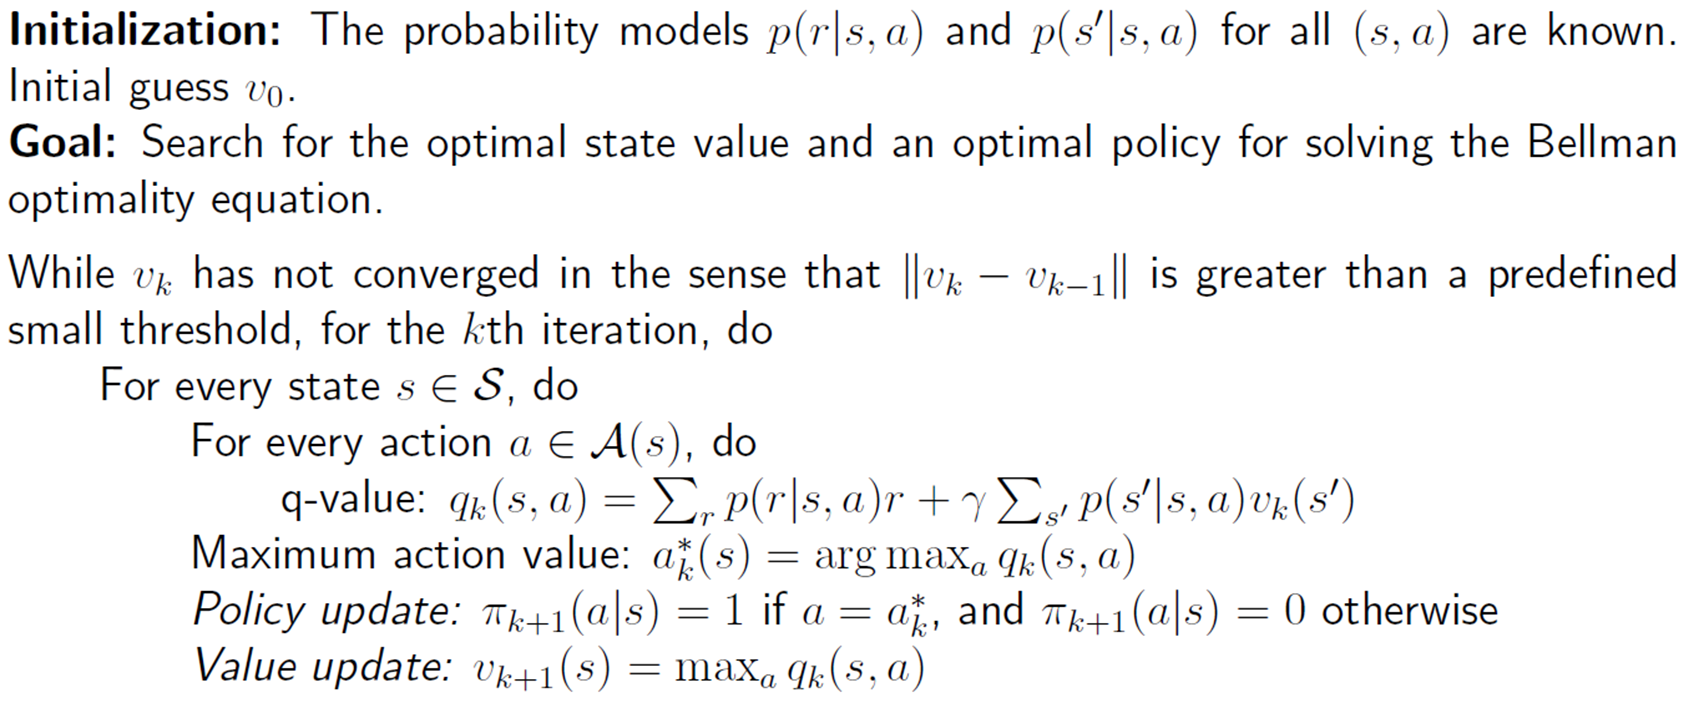

In [17]:
def value_update(env, V, gamma=1):
    new_V = np.copy(V)
    for s in range(env.observation_space.n):
        new_V[s] = max([
            sum([
                prob * (reward + gamma * V[next_state])
                for prob, next_state, reward, done in env.P[s][a]
            ])
            for a in range(env.action_space.n)
        ])
    return new_V

In [18]:
def policy_update(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for s in range(env.observation_space.n):
        q_values = [
            sum([
                prob * (reward + gamma * V[next_state])
                for prob, next_state, reward, done in env.P[s][a]
            ])
            for a in range(env.action_space.n)
        ]
        
        best_a = np.argwhere(q_values == np.max(q_values)).flatten()

        policy[s] = np.sum([np.eye(env.action_space.n)[i] for i in best_a], axis=0) / len(best_a)
    
    return policy

In [19]:
def value_iteration(env, gamma=1, theta=1e-6):
    V = np.zeros(env.observation_space.n)
    while True:
        new_V = value_update(env, V, gamma)
        
        delta = np.max(np.abs(V - new_V))
        if delta < theta:
            break
        
        V = new_V

    policy = policy_update(env, V, gamma)
    
    return policy, V

## Experiment 

### FrozenLake-v1

In [20]:
name = 'FrozenLake-v1'

In [21]:
time_experiments(name)

+----------------------------+---------+------------+------------+
| Algorithm                  |   Gamma | Slippery   |   Time (s) |
+============================+=========+============+============+
| Policy Iteration           |     0.9 | False      |     0.0741 |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     0.9 | True       |     0.2374 |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     1   | False      |    14.1929 |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     1   | True       |     0.857  |
+----------------------------+---------+------------+------------+
| Truncated Policy Iteration |     0.9 | False      |     0.0514 |
+----------------------------+---------+------------+------------+
| Truncated Policy Iteration |     0.9 | True       |     0.1189 |
+----------------------------+---------+------------+---------

FrozenLake-v1, Slippery=False, γ=0.9:


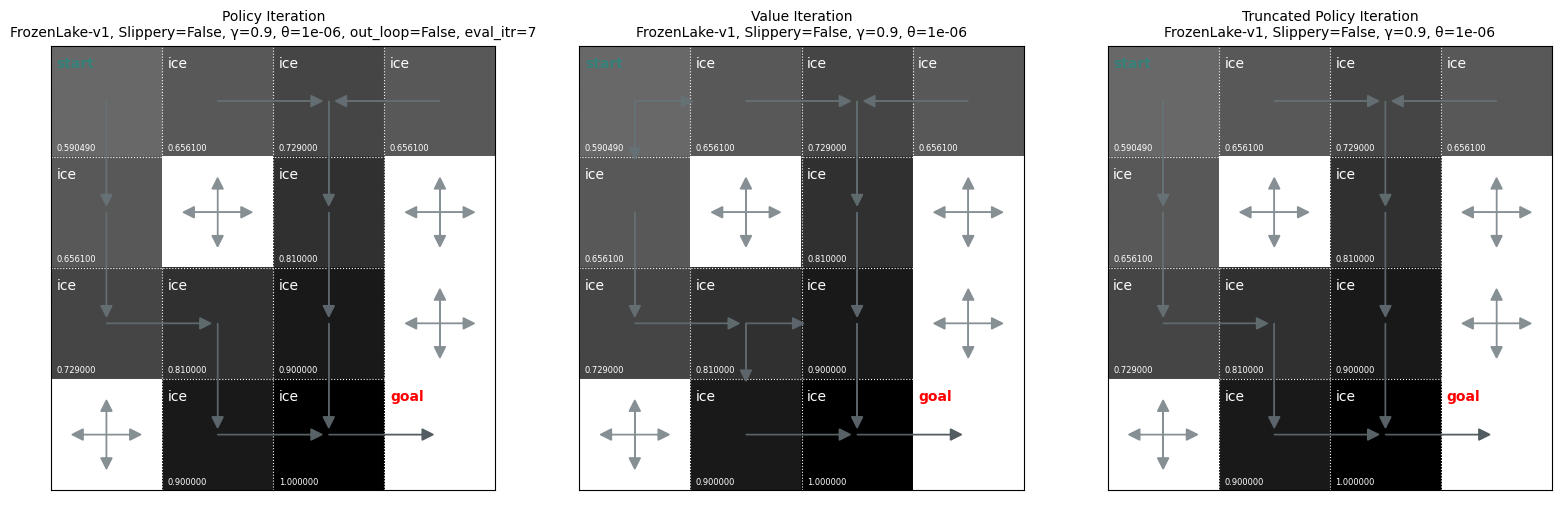

FrozenLake-v1, Slippery=True, γ=0.9:


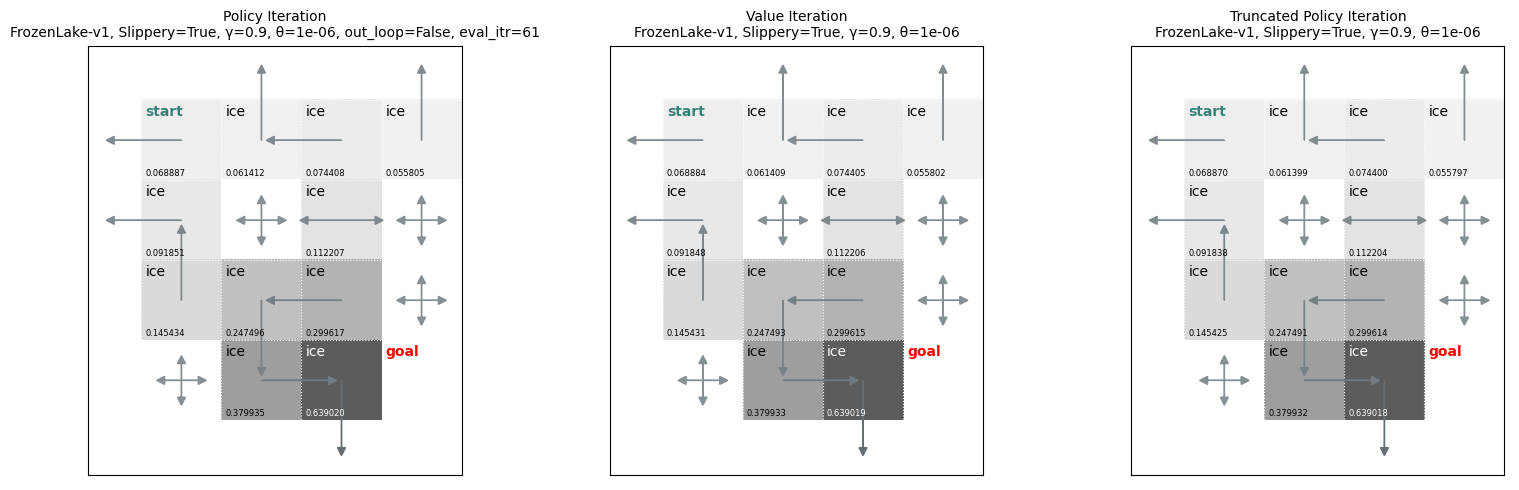

FrozenLake-v1, Slippery=False, γ=1.0:


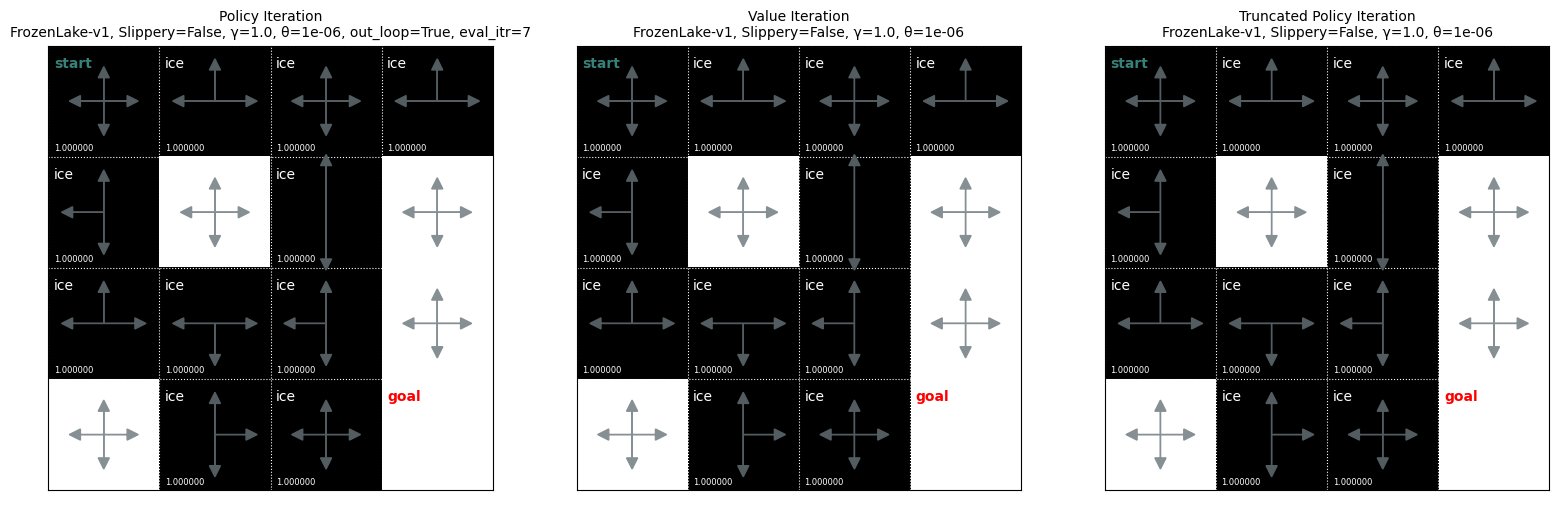

FrozenLake-v1, Slippery=True, γ=1.0:


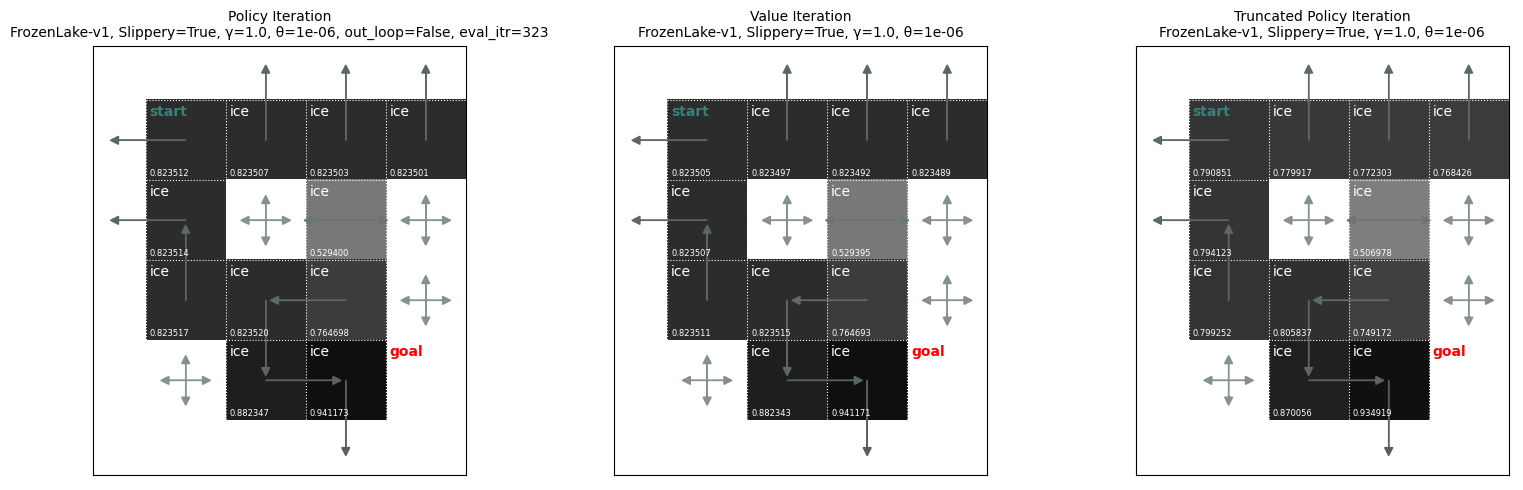

In [22]:
run_experiments(name)

### FrozenLake8x8-v1

In [23]:
name = 'FrozenLake8x8-v1'

In [24]:
time_experiments(name)

+----------------------------+---------+------------+------------+
| Algorithm                  |   Gamma | Slippery   |   Time (s) |
+============================+=========+============+============+
| Policy Iteration           |     0.9 | False      |     0.5213 |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     0.9 | True       |     1.3714 |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     1   | False      |   252.473  |
+----------------------------+---------+------------+------------+
| Policy Iteration           |     1   | True       |    18.72   |
+----------------------------+---------+------------+------------+
| Truncated Policy Iteration |     0.9 | False      |     0.3943 |
+----------------------------+---------+------------+------------+
| Truncated Policy Iteration |     0.9 | True       |     1.258  |
+----------------------------+---------+------------+---------

FrozenLake8x8-v1, Slippery=False, γ=0.9:


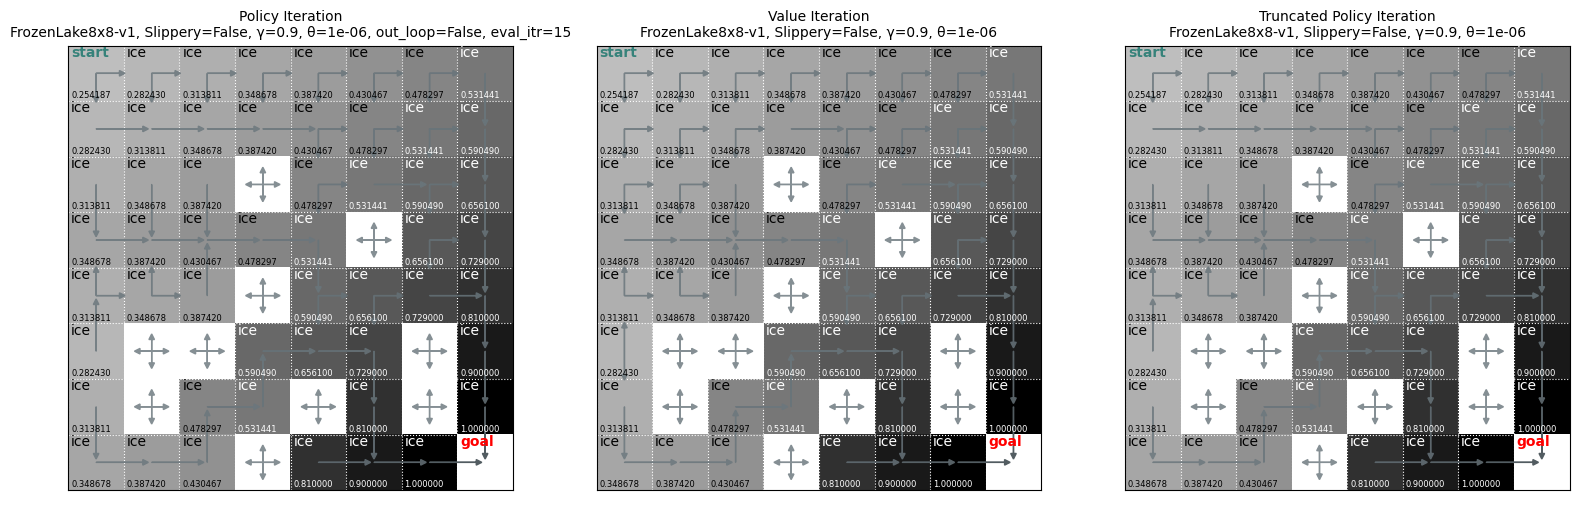

FrozenLake8x8-v1, Slippery=True, γ=0.9:


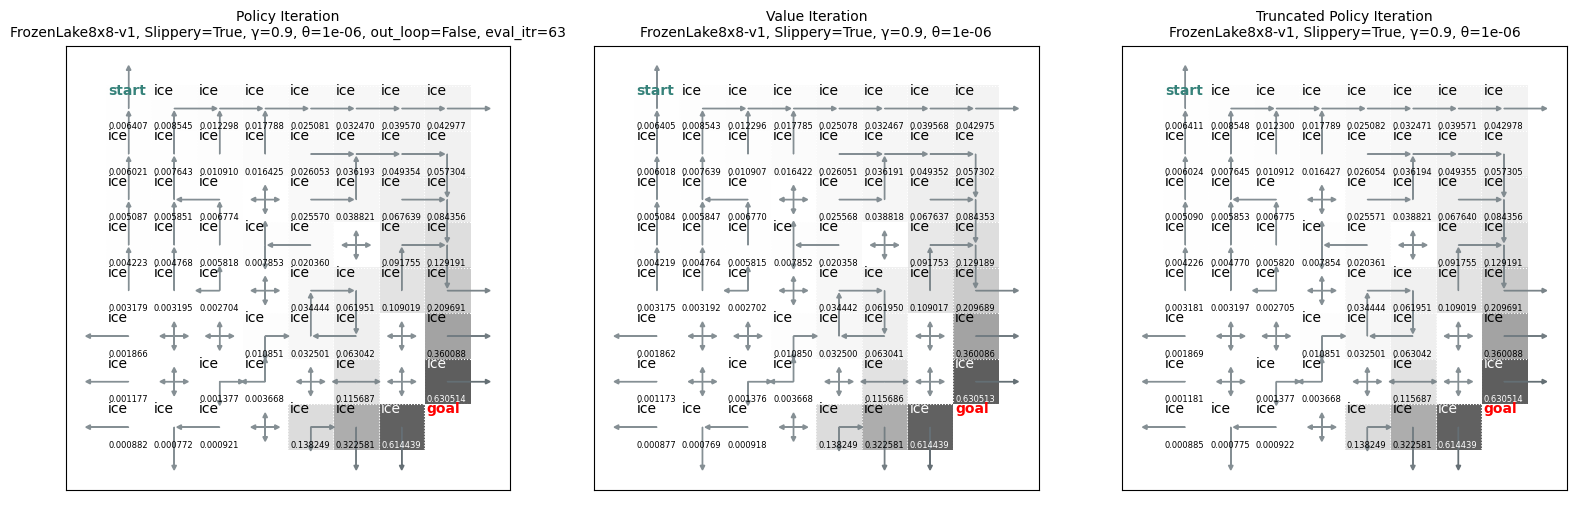

FrozenLake8x8-v1, Slippery=False, γ=1.0:


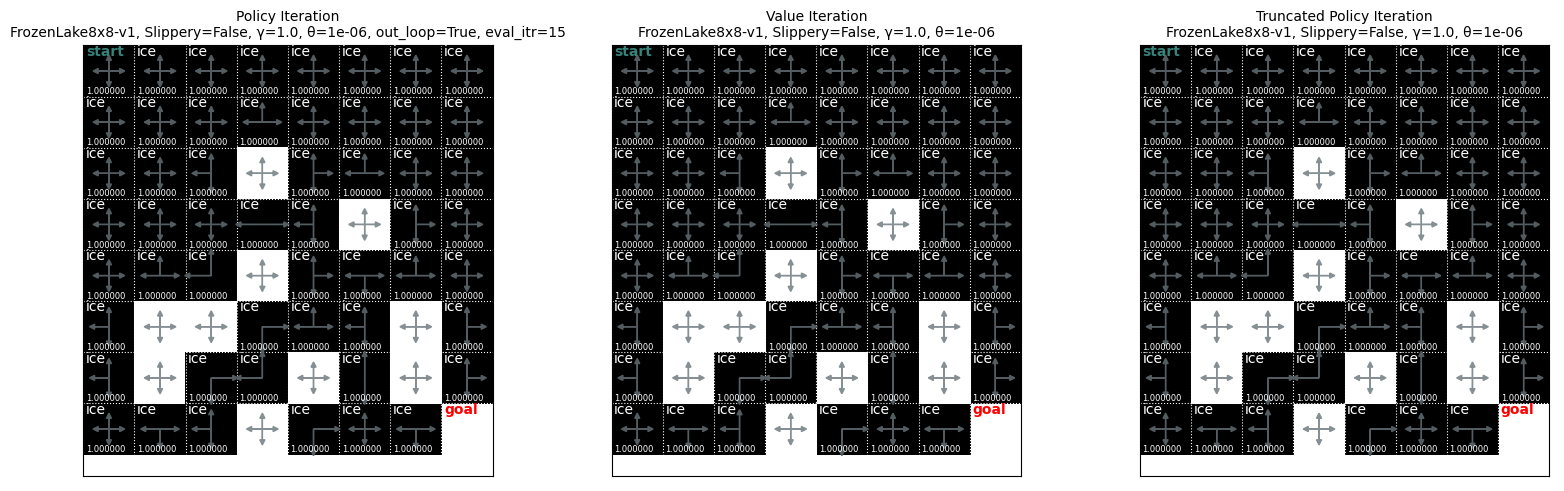

FrozenLake8x8-v1, Slippery=True, γ=1.0:


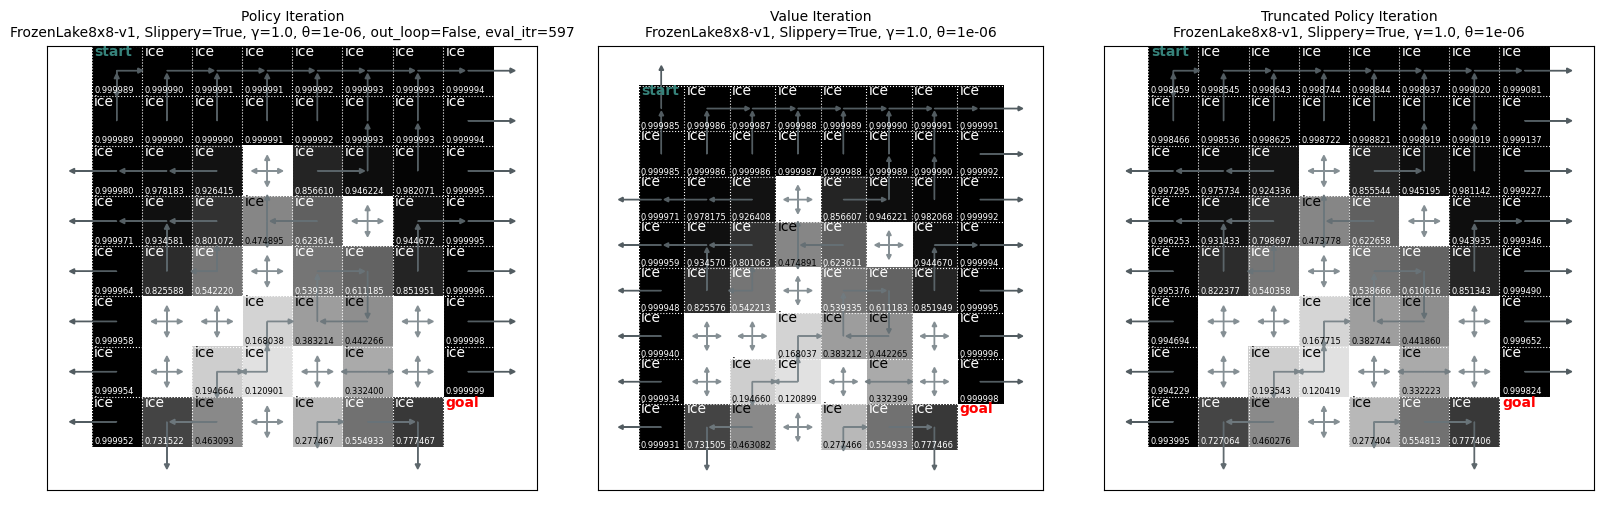

In [25]:
run_experiments(name)

## Nhận xét kết quả thực nghiệm

Thời gian chạy của Value Iteration luôn thấp nhất trong tất cả các thuật toán. Truncated Policy Iteration chạy nhanh hơn Policy Iteration.

### Policy Iteration

Khi giải quyết các bài toán bằng Policy Iteration, thì với gamma = 1.0 và môi trường FrozenLake có is_slippery=False dẫn đến việc các giá trị được cập nhật rất nhỏ trong mỗi vòng lặp vì:

- Khi is_slippery = False, môi trường FrozenLake trở thành deterministic (xác định). Mỗi hành động sẽ luôn dẫn đến trạng thái tiếp theo cố định mà không có yếu tố ngẫu nhiên.
- Trong môi trường này, bạn có thể dễ dàng tìm ra một chuỗi hành động tối ưu để đi từ trạng thái ban đầu đến trạng thái đích (goal). Tuy nhiên, nếu 
𝛾 = 1.0, giá trị 𝑉(𝑠) sẽ tiếp tục tích lũy giá trị tối ưu mãi, không giảm, dẫn đến việc thuật toán không hội tụ.

Cũng trong FrozenLake với các giá trị parameters tương tự như trên phần thưởng nhận được khi đến trạng thái mục tiêu (goal) là 
1.0, thì tất cả các trạng thái trên đường dẫn tối ưu đến trạng thái này sẽ có giá trị 𝑉(𝑠) = 1.0 do các phần thưởng cộng dồn không giảm giá trị qua các bước (𝛾 = 1.0).

Để giải quyết về việc nó chạy vô tận (tất nhiên là ngoài việc giảm gamma và thay is_slippery = True) thì em đã để giới hạn chạy vòng lặp trong policy iteration là 50 vòng nếu quá 50 vòng thì giá trị out_loop sẽ là True (tất nhiên kết quả trả về không phải là optimal).


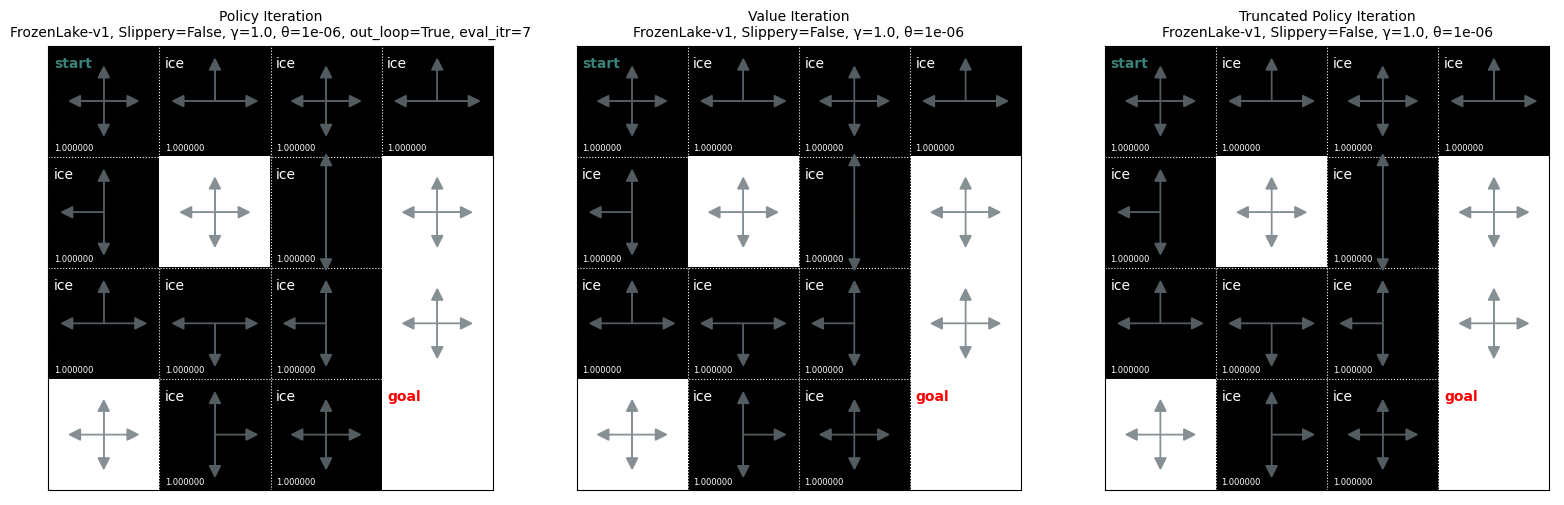
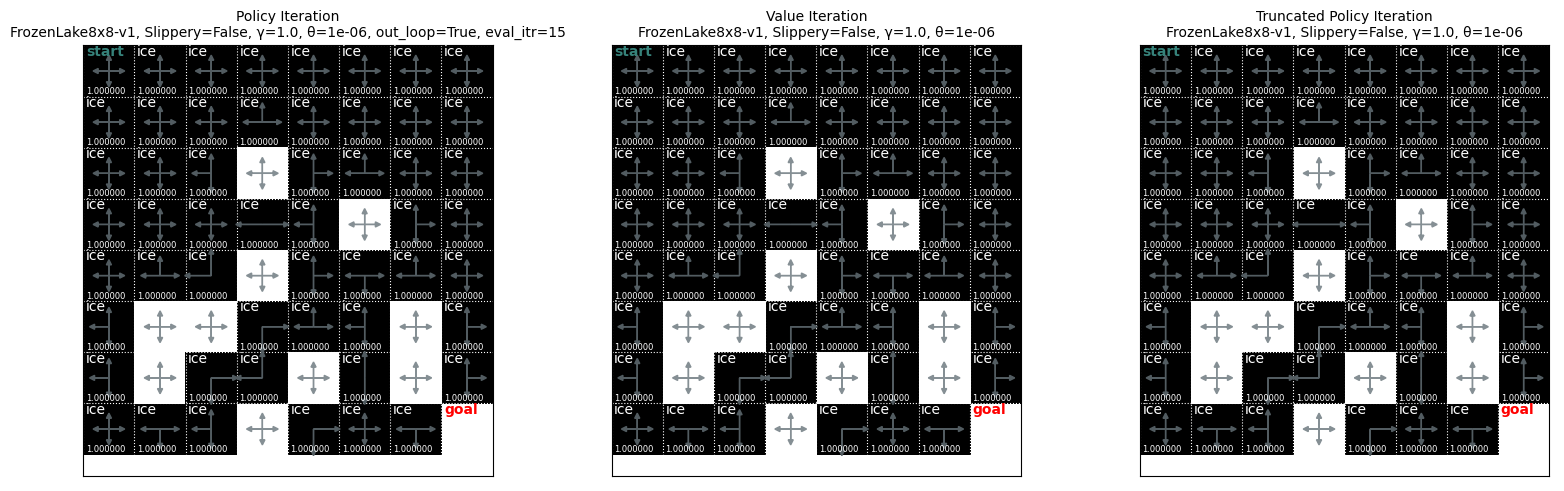

### Truncated Policy Iteration

Em có thử một list các giá trị khác nhau của n_iterations = [2, 4, 10, 20, 50, 100] và đồng thời in ra số iteration khi hàm policy evaluation hội tụ (giá trị eval_itr trong plot của Policy Iteration). Tất nhiên nếu n_iterations $\geq$ eval_itr thì các giá trị của state và policy sẽ giống như Policy Iteration còn nếu n_iterations < eval_itr thì policy giống như Policy Iteration nhưng các giá trị của state thì khác (đối với n_iterations = 50). 


Cũng tương tự như Policy Iteration thì Truncated Policy Iteration cũng gặp vấn đề tương tự như trên đối với FrozenLake(gamma=1.0, is_slippery=True)

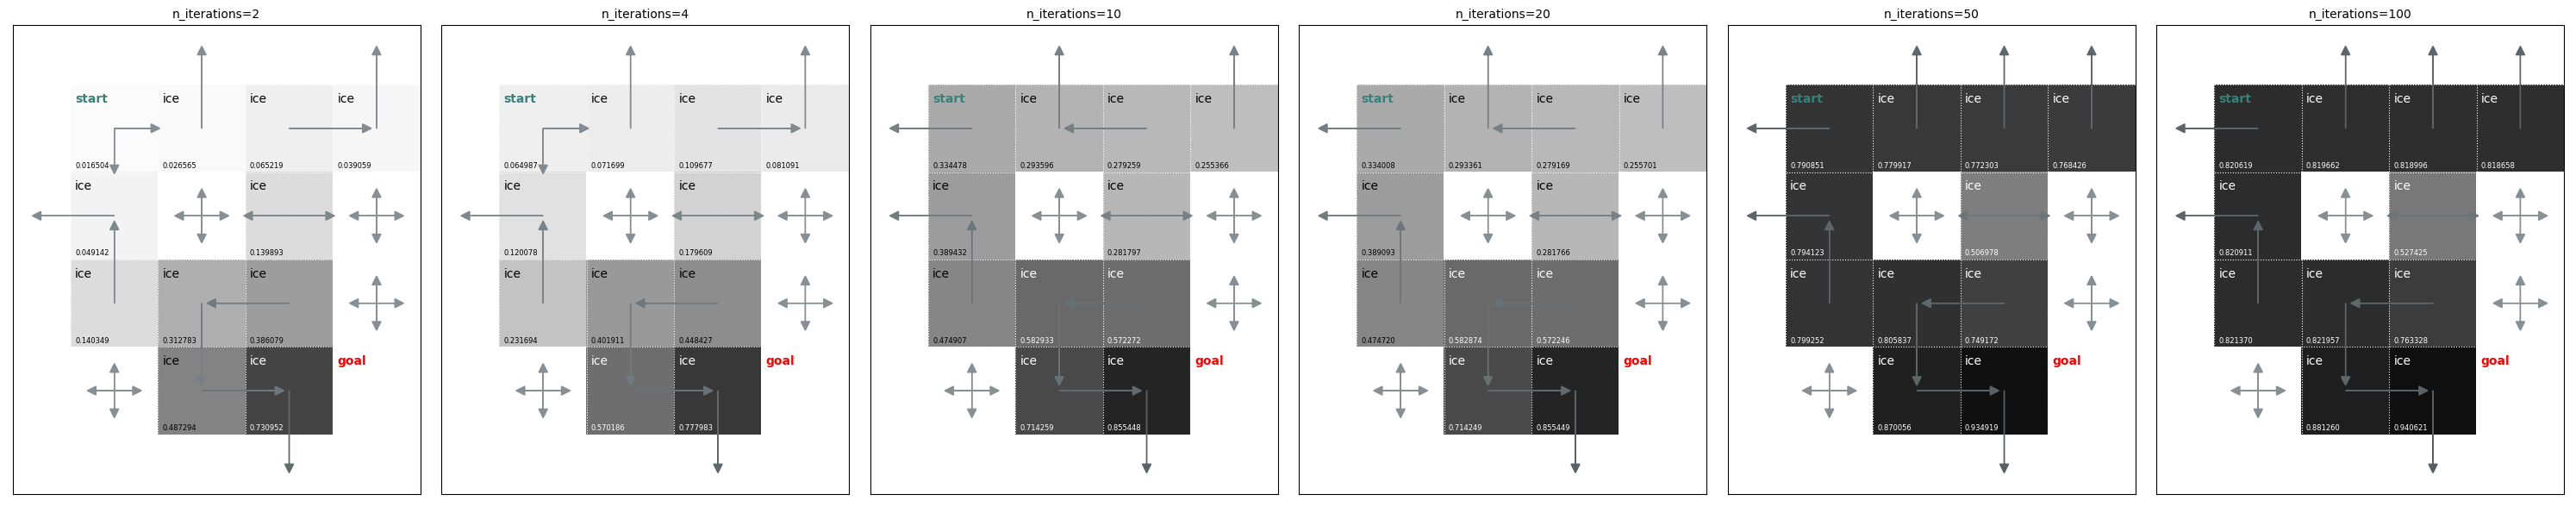

### Value Iteration

Trong FrozenLake(gamma=1.0, is_slippery=False) hội tụ nhanh hơn vì môi trường xác định (is_slippery=False), các giá trị của state được cập nhật trực tiếp (chỉ một vòng lặp như nếu xét trong policy iteration) nên nó sẽ không bị chạy gần như vô tận như các thuật Policy Iteration hay Truncated Policy Iteration, tuy nhiên policy trong môi trường này vẫn không phải là optimal vì tất cả các giá trị của state đều là 1.0 nên chỉ cần hành động không đi vào ô hố (hole) thì đều sẽ được coi là $a^*$ vì đều làm cho q-value lớn nhất.

Hiệu suất và hiệu quả đối với các môi trường khác thì gần như tương đương đối với Policy Iteration. 

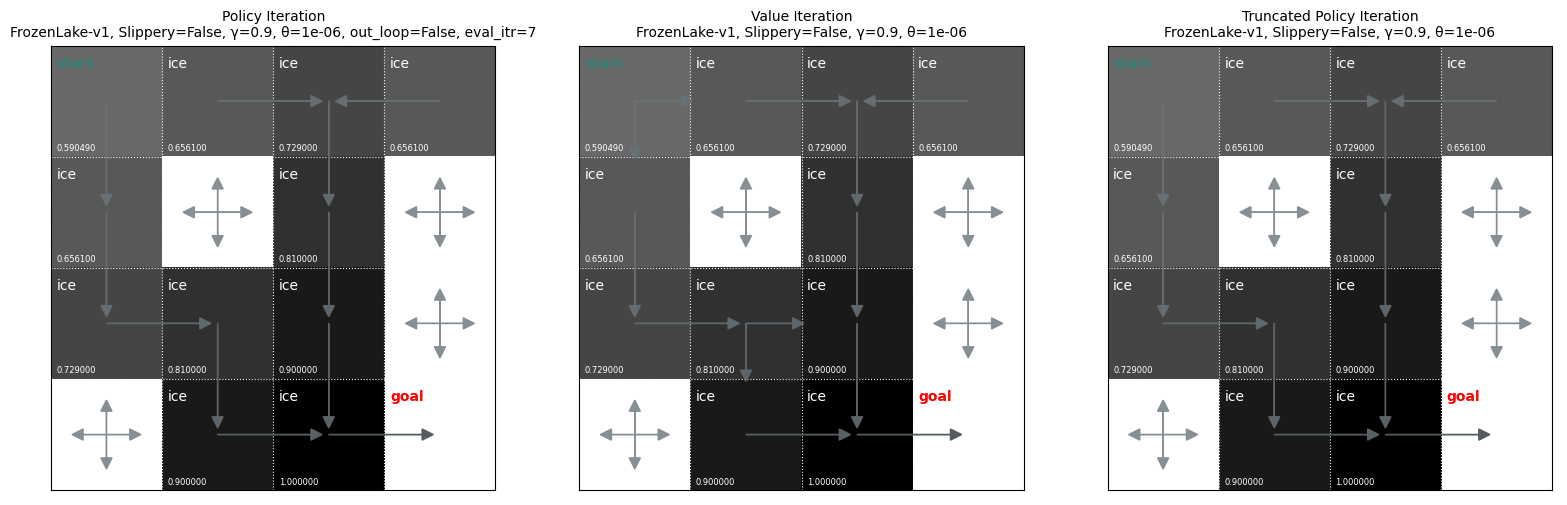